# Problem Statement: To Predict how likely individuals are to receive their H1N1 and Seasonal Flu Vaccines.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import io
%cd "C:\Users\sujit\Downloads\PGA 26 datasets\Flu Prediction"

C:\Users\sujit\Downloads\PGA 26 datasets\Flu Prediction


In [3]:
# Load the Data
vaccinetrain=pd.read_csv('training_set_features.csv')
vaccinetest=pd.read_csv('test_set_features.csv')
vaccinelabels=pd.read_csv('training_set_labels.csv')

In [4]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
vaccinetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [6]:
# For preprocessing - Concat both train and test - Row wise Concatenation
df=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [7]:
# info() method shows some of the characteristics of the data such as Column Name, No. of non-null values of our columns, 
#Dtype of the data, and Memory Usage.
df.info()
# Many Variables have Null Values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [8]:
df.shape

(53415, 36)

In [9]:
df.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

# Missing Value Imputation: Strategy (MICE - IterativeImputer)

It is an iterative imputation method that imputes missing values by creating multiple imputed datasets based on the observed data.

Iterative Process: MICE imputation involves multiple iterations, where each iteration imputes missing values for one variable at a time. The imputation process is performed in a chained manner, meaning that the imputed values from one variable are used as predictors for imputing missing values in other variables.

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [11]:
# Before Imputation LabelEncoding must be done, Keeping missing values as missing only
pd.set_option('display.max_columns',36)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [12]:
original=df

In [13]:
mask=df.isnull()

In [14]:
df=df.astype(str).apply(LabelEncoder().fit_transform)

In [15]:
df=df.where(~mask,original)

In [16]:
imputer=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy='most_frequent',max_iter=20)

In [17]:
df=df.drop('respondent_id',axis=1)

In [18]:
df_imp=imputer.fit_transform(df)

In [19]:
df_imp=pd.DataFrame(df_imp,columns=df.columns)

In [20]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

<Axes: >

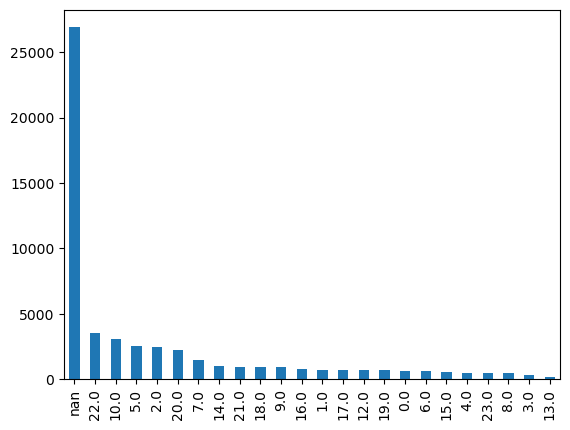

In [21]:
df.employment_occupation.value_counts(dropna=False).plot(kind='bar')

<Axes: >

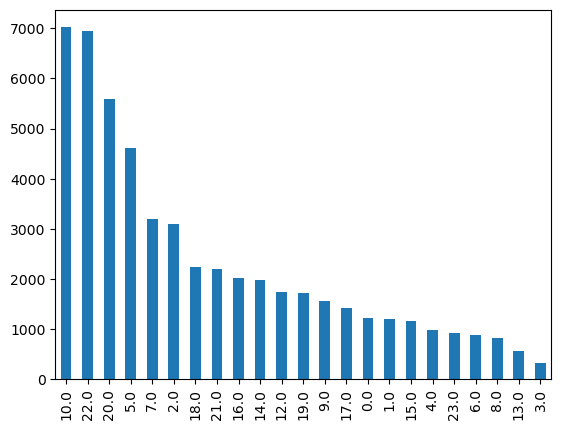

In [22]:
df_imp.employment_occupation.value_counts(dropna=False).plot(kind='bar')

In [23]:
# Split Data back to train and test
vaccinetrain_df=df_imp.iloc[:26707,]

In [24]:
vaccinetest_df=df_imp.iloc[26707:]

In [25]:
print(vaccinetrain.shape)
print(vaccinetrain_df.shape)
print(vaccinetest.shape)
print(vaccinetest_df.shape)

(26707, 36)
(26707, 35)
(26708, 36)
(26708, 35)


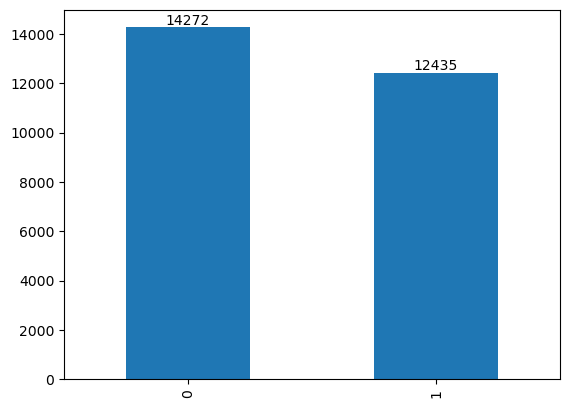

In [26]:
# Dependent Variable 1 - Seasonal vaccine - Balanced Data
a=vaccinelabels.seasonal_vaccine.value_counts().plot(kind='bar')
for i in a.containers:
    a.bar_label(i,fontsize=10)

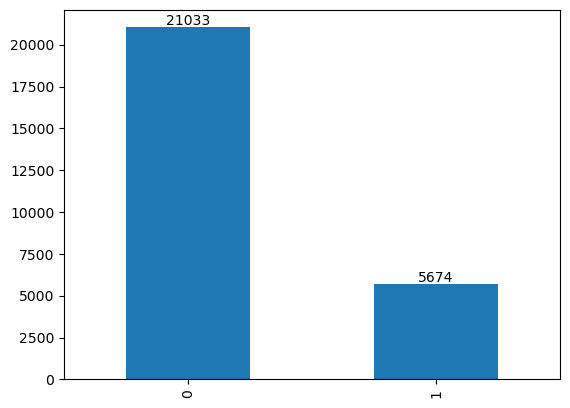

In [27]:
# Dependent Variable 2 - H1N1 vaccine - ImBalanced Data
a=vaccinelabels.h1n1_vaccine.value_counts().plot(kind='bar')
for i in a.containers:
    a.bar_label(i,fontsize=10)

In [28]:
vaccinelabels.shape

(26707, 3)

# Hypothesis Testing:

# a) Seasonal_Vaccine

In [29]:
from scipy.stats import chi2_contingency

In [30]:
# Null Hypothesis : There is Significance between seasonalvaccine and sex
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.sex)

sex,0.0,1.0
seasonal_vaccine,,
0,7970,6302
1,7888,4547


In [31]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.sex))
# Since p value < 0.05, reject null 

Chi2ContingencyResult(statistic=158.40462897107128, pvalue=2.5248076319253385e-36, dof=1, expected_freq=array([[8474.38409406, 5797.61590594],
       [7383.61590594, 5051.38409406]]))

In [32]:
# Null Hypothesis : There is Significance between seasonalvaccine and income_poverty
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.income_poverty)

income_poverty,0.0,1.0,2.0
seasonal_vaccine,,,
0,8017,4022,2233
1,7286,3854,1295


In [33]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.income_poverty))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=162.30380344738785, pvalue=5.703965439453069e-36, dof=2, expected_freq=array([[8177.79668252, 4208.86928521, 1885.33403228],
       [7125.20331748, 3667.13071479, 1642.66596772]]))

In [34]:
# Null Hypothesis : There is Significance between seasonalvaccine and education
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.education)

education,0.0,1.0,2.0,3.0
seasonal_vaccine,,,,
0,3413,1536,5208,4115
1,2730,1012,5344,3349


In [35]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.education))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=138.36339150195715, pvalue=8.517799322803606e-30, dof=3, expected_freq=array([[3282.76841278, 1361.63013442, 5638.90156139, 3988.69989141],
       [2860.23158722, 1186.36986558, 4913.09843861, 3475.30010859]]))

In [36]:
# Null Hypothesis : There is Significance between seasonalvaccine and doctor_recc_seasonal
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.doctor_recc_seasonal)

doctor_recc_seasonal,0.0,1.0
seasonal_vaccine,,
0,11747,2525
1,6118,6317


In [37]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.doctor_recc_seasonal))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=3287.572246528344, pvalue=0.0, dof=1, expected_freq=array([[9546.90830119, 4725.09169881],
       [8318.09169881, 4116.90830119]]))

In [38]:
# Null Hypothesis : There is Significance between seasonalvaccine and behavioral_face_mask
pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.behavioral_face_mask)

behavioral_face_mask,0.0,1.0
seasonal_vaccine,,
0,13456,816
1,11405,1030


In [39]:
chi2_contingency(pd.crosstab(vaccinelabels.seasonal_vaccine,vaccinetrain_df.behavioral_face_mask))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=67.5812977603207, pvalue=2.0217627355545033e-16, dof=1, expected_freq=array([[13285.5128618,   986.4871382],
       [11575.4871382,   859.5128618]]))

# b) H1N1_Vaccine

In [40]:
# Null Hypothesis : There is no significance between h1n1vaccine and sex
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.sex)

sex,0.0,1.0
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [41]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.sex))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=11.309981152455997, pvalue=0.0007709155489949327, dof=1, expected_freq=array([[12488.90979893,  8544.09020107],
       [ 3369.09020107,  2304.90979893]]))

In [42]:
# Null Hypothesis : There is no significance between seasonalvaccine and income_poverty
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.income_poverty)

income_poverty,0.0,1.0,2.0
h1n1_vaccine,,,
0,12227,5920,2886
1,3076,1956,642


In [43]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.income_poverty))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=92.22845010144931, pvalue=9.393912772845402e-21, dof=2, expected_freq=array([[12051.82158236,  6202.71494365,  2778.463474  ],
       [ 3251.17841764,  1673.28505635,   749.536526  ]]))

In [44]:
# Null Hypothesis : There is no significance between h1n1_vaccine and education
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.education)

education,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,5010,2126,7969,5928
1,1133,422,2583,1536


In [45]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.education))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=130.1365277206491, pvalue=5.054187027201439e-28, dof=3, expected_freq=array([[4837.89714307, 2006.66806455, 8310.18893923, 5878.24585315],
       [1305.10285693,  541.33193545, 2241.81106077, 1585.75414685]]))

In [46]:
# Null Hypothesis : There is no significance between h1n1_vaccine and doctor_recc_seasonal
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.doctor_recc_seasonal)

doctor_recc_seasonal,0.0,1.0
h1n1_vaccine,,
0,15084,5949
1,2781,2893


In [47]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.doctor_recc_seasonal))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=1038.9485530658712, pvalue=6.14347703127931e-228, dof=1, expected_freq=array([[14069.51529562,  6963.48470438],
       [ 3795.48470438,  1878.51529562]]))

In [48]:
# Null Hypothesis : There is no significance between h1n1_vaccine and behavioral_face_mask
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.behavioral_face_mask)

behavioral_face_mask,0.0,1.0
h1n1_vaccine,,
0,19775,1258
1,5086,588


In [49]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.behavioral_face_mask))
# Since p value < 0.05 reject null 

Chi2ContingencyResult(statistic=132.67399970960585, pvalue=1.0654676678240947e-30, dof=1, expected_freq=array([[19579.18946344,  1453.81053656],
       [ 5281.81053656,   392.18946344]]))

Splitting Data into X & y

In [50]:
y1=vaccinelabels.seasonal_vaccine
y=vaccinelabels.h1n1_vaccine
X=vaccinetrain_df

# Model Building and Idealogy :

As there are two binary variables to target, Let's create a classification model for each variable separately.

# Logistic Regression without balancing data of H1N1 Vaccine

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [55]:
logit=LogisticRegression(max_iter=2000)

In [78]:
logitmodel=logit.fit(X,y)

In [80]:
logitmodel.score(X,y)

0.8307559815778635

In [82]:
np.mean(cross_val_score(logit,X,y))

0.830344261535499

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,classification_report,roc_curve,auc

In [85]:
log_pred=logitmodel.predict(X)

In [90]:
print(classification_report(y,log_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.82      0.83      0.81     26707



In [86]:
# Get predicted probabilities
log_pred_prob=logitmodel.predict_proba(X)[:,1]

In [87]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, log_pred_prob)

In [88]:
logroc_auc = auc(fpr, tpr)

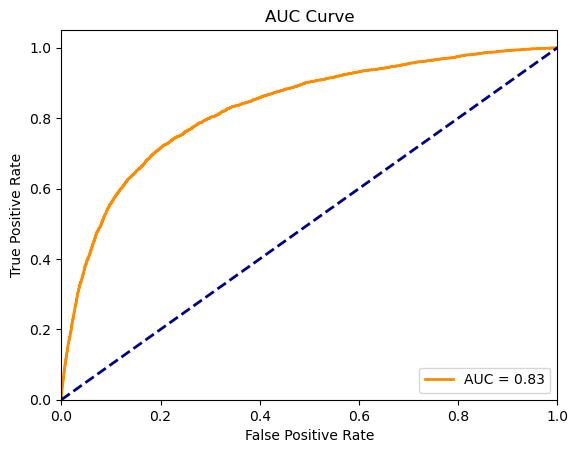

In [89]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % logroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

The variable seasonal vaccine is balanced, whereas the h1n1 vaccine variable is not. and as we see classification report 
the prediction for minority class is worst

Let's use SMOTE to balance the h1n1 vaccine variable.

# Balancing the H1N1 Vaccine with Imbalance data using SMOTE

In [51]:
from imblearn.over_sampling import SMOTEN

In [52]:
smote=SMOTEN(random_state=42)

In [53]:
X_smt,y_smt=smote.fit_resample(X,y)

# Logistic Regression H1N1 Vaccine

In [94]:
logit=LogisticRegression(max_iter=2000)

In [95]:
logitmodel=logit.fit(X_smt,y_smt)

In [97]:
logitmodel.score(X_smt,y_smt)

0.8135548899348642

In [98]:
np.mean(cross_val_score(logit,X_smt,y_smt))

0.8018619864313468

In [99]:
log_pred=logitmodel.predict(X_smt)

In [100]:
print(classification_report(y_smt,log_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



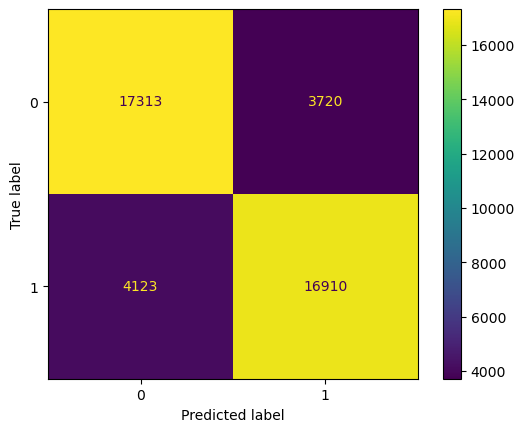

In [143]:
ConfusionMatrixDisplay.from_predictions(y_smt,log_pred)

In [101]:
# Get predicted probabilities
log_pred_prob=logitmodel.predict_proba(X_smt)[:,1]

In [102]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_smt, log_pred_prob)

In [103]:
logroc_auc = auc(fpr, tpr)

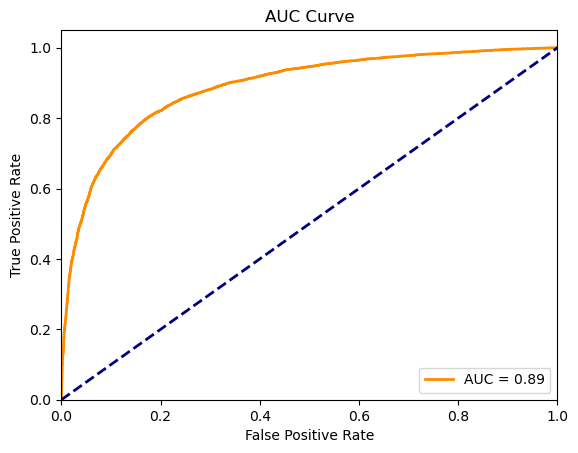

In [104]:
# Plot AUC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % logroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# the label is set as 'AUC = %0.2f' % roc_auc, displaying the AUC value on the legend.
# The code also plots a diagonal dashed line ([0, 1], [0, 1]) representing a random classifier.
# The plt.xlim and plt.ylim functions set the limits of the x-axis and y-axis, respectively.

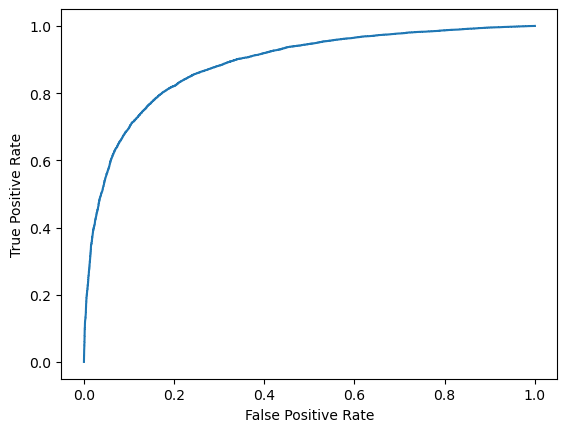

In [105]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

In [106]:
log_pred_s1=logitmodel.predict_proba(vaccinetest_df)

# Decision Tree H1N1 Vaccine

In [107]:
tree=DecisionTreeClassifier(max_depth=12)

In [108]:
treemodel=tree.fit(X_smt,y_smt)

In [109]:
treemodel.score(X_smt,y_smt)

0.8822326819759425

In [111]:
np.mean(cross_val_score(tree,X_smt,y_smt))

0.8004362271017573

In [112]:
tree_pred=treemodel.predict(X_smt)

In [117]:
print(classification_report(y_smt,tree_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     21033
           1       0.87      0.91      0.88     21033

    accuracy                           0.88     42066
   macro avg       0.88      0.88      0.88     42066
weighted avg       0.88      0.88      0.88     42066



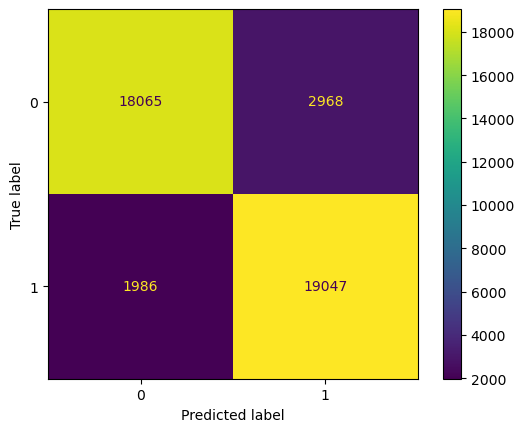

In [118]:
ConfusionMatrixDisplay.from_predictions(y_smt,tree_pred)

In [113]:
treepred_prob=treemodel.predict_proba(X_smt)[:,1]

In [114]:
fpr, tpr, thresholds = roc_curve(y_smt, treepred_prob)

In [115]:
treeroc_auc = auc(fpr, tpr)

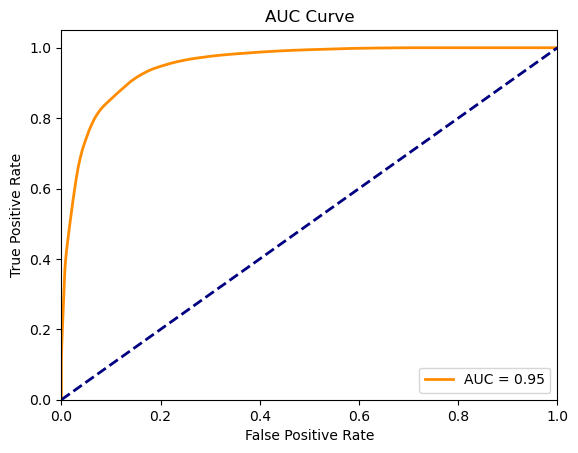

In [116]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % treeroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest H1N1 Vaccine

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=10)

In [121]:
rfmodel=rf.fit(X_smt,y_smt)

In [122]:
rf.score(X_smt,y_smt)

0.8643084676460799

In [123]:
np.mean(cross_val_score(rf,X_smt,y_smt))

0.8235661155888805

In [124]:
rf_pred=rfmodel.predict(X_smt)

In [129]:
print(classification_report(y_smt,rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     21033
           1       0.88      0.85      0.86     21033

    accuracy                           0.86     42066
   macro avg       0.86      0.86      0.86     42066
weighted avg       0.86      0.86      0.86     42066



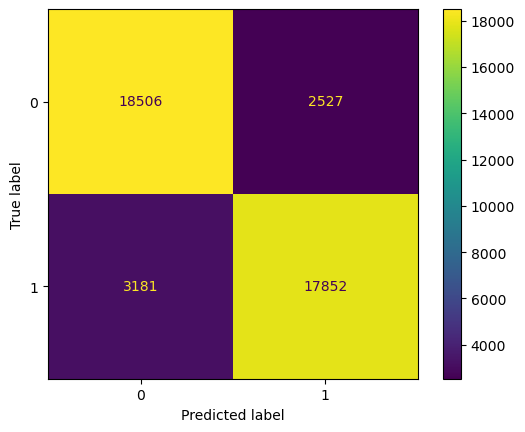

In [130]:
ConfusionMatrixDisplay.from_predictions(y_smt,rf_pred)

In [125]:
rfpred_prob=rfmodel.predict_proba(X_smt)[:,1]

In [126]:
fpr, tpr, thresholds = roc_curve(y_smt, rfpred_prob)

In [127]:
rfroc_auc = auc(fpr, tpr)

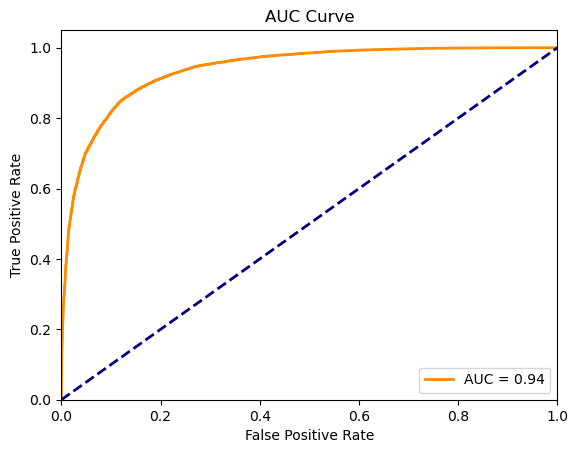

In [128]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % rfroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting H1N1 Vaccine

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
gb=GradientBoostingClassifier(n_estimators=700)

In [133]:
gbmodel=gb.fit(X_smt,y_smt)

In [134]:
gbmodel.score(X_smt,y_smt)

0.8623591499072886

In [135]:
np.mean(cross_val_score(gb,X_smt,y_smt))

0.8343832825080748

In [136]:
gb_pred=gbmodel.predict(X_smt)

In [141]:
print(classification_report(y_smt,gb_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     21033
           1       0.86      0.86      0.86     21033

    accuracy                           0.86     42066
   macro avg       0.86      0.86      0.86     42066
weighted avg       0.86      0.86      0.86     42066



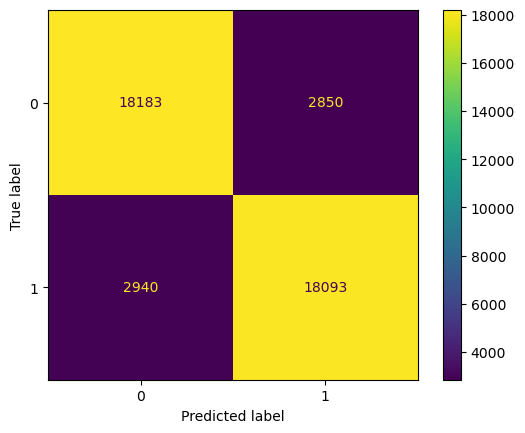

In [142]:
ConfusionMatrixDisplay.from_predictions(y_smt,gb_pred)

In [137]:
gbpred_prob=gbmodel.predict_proba(X_smt)[:,1]

In [138]:
fpr, tpr, thresholds = roc_curve(y_smt, gbpred_prob)

In [139]:
gbroc_auc = auc(fpr, tpr)

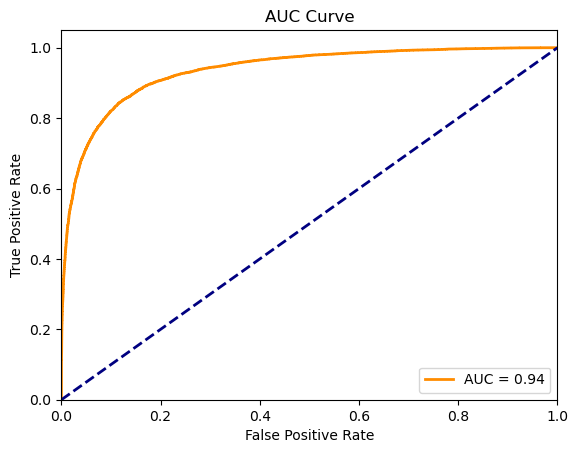

In [140]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % gbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes H1N1 Vaccine

In [144]:
from sklearn.naive_bayes import BernoulliNB

In [145]:
nb=BernoulliNB()

In [146]:
nbmodel=nb.fit(X_smt,y_smt)

In [147]:
nbmodel.score(X_smt,y_smt)

0.7649170351352637

In [148]:
np.mean(cross_val_score(nb,X_smt,y_smt))

0.757645370443961

In [318]:
nb_pred=nbmodel.predict(X_smt)

In [316]:
print(classification_report(y_smt,nb_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     21033
           1       0.89      0.88      0.89     21033

    accuracy                           0.89     42066
   macro avg       0.89      0.89      0.89     42066
weighted avg       0.89      0.89      0.89     42066



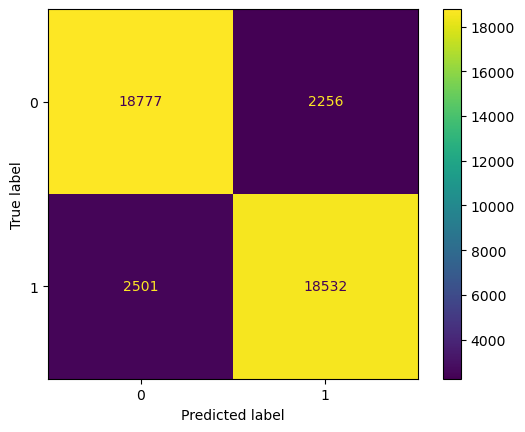

In [317]:
ConfusionMatrixDisplay.from_predictions(y_smt,nb_pred)

In [319]:
nbpred_prob=nbmodel.predict_proba(X_smt)[:,1]

In [320]:
fpr, tpr, thresholds = roc_curve(y_smt, nbpred_prob)

In [321]:
nbroc_auc = auc(fpr, tpr)

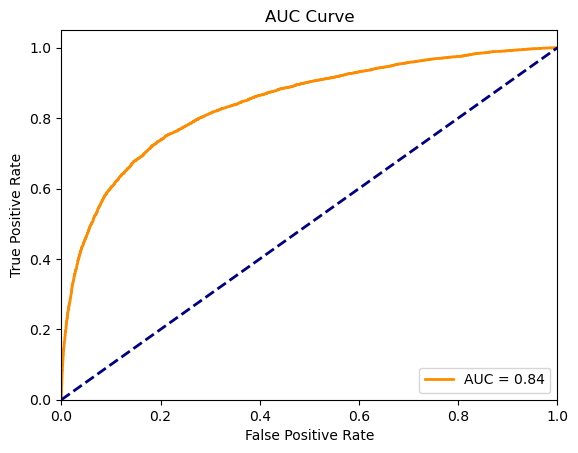

In [322]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % nbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine H1N1 Vaccine

In [149]:
from sklearn.svm import SVC

In [150]:
svc=SVC(probability=True)

In [151]:
svcmodel=svc.fit(X_smt,y_smt)

In [152]:
svcmodel.score(X_smt,y_smt)

0.8241810488280321

In [153]:
np.mean(cross_val_score(svc,X_smt,y_smt))

0.8069256434749542

In [154]:
svc_pred=svc.predict(X_smt)

In [155]:
print(classification_report(y_smt,svc_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     21033
           1       0.83      0.81      0.82     21033

    accuracy                           0.82     42066
   macro avg       0.82      0.82      0.82     42066
weighted avg       0.82      0.82      0.82     42066



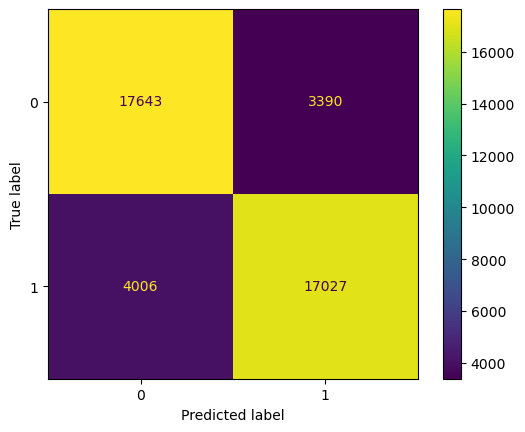

In [156]:
ConfusionMatrixDisplay.from_predictions(y_smt,svc_pred)

In [157]:
svcpred_prob=svcmodel.predict_proba(X_smt)[:,1]

In [158]:
fpr, tpr, thresholds = roc_curve(y_smt, svcpred_prob)

In [159]:
svcroc_auc = auc(fpr, tpr)

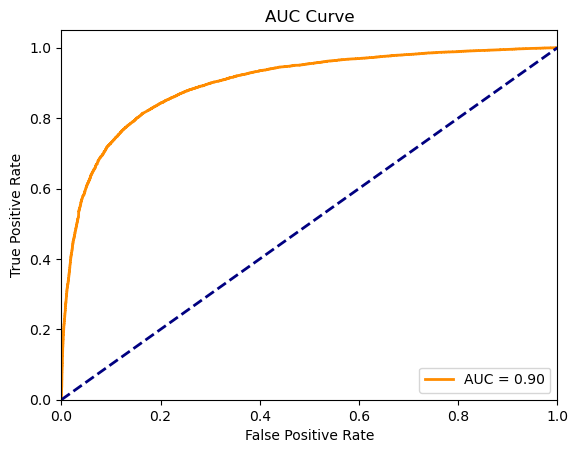

In [160]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % svcroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# KNearest Neighbours H1N1 Vaccine

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [162]:
knn=KNeighborsClassifier()

In [163]:
krange=list(range(1,41))
param_grid=dict(n_neighbors=krange)
grid=GridSearchCV(knn,param_grid,cv=3)

In [164]:
grid_search=grid.fit(X_smt,y_smt)

In [165]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [166]:
grid_search.best_params_

{'n_neighbors': 2}

In [171]:
knn=KNeighborsClassifier(n_neighbors=10)

In [172]:
knnmodel=knn.fit(X_smt,y_smt)

In [173]:
knnmodel.score(X_smt,y_smt)

0.8334759663386108

In [174]:
np.mean(cross_val_score(knn,X_smt,y_smt))

0.7855538776889797

In [175]:
knn_pred=knnmodel.predict(X_smt)

In [176]:
print(classification_report(y_smt,knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     21033
           1       0.81      0.87      0.84     21033

    accuracy                           0.83     42066
   macro avg       0.84      0.83      0.83     42066
weighted avg       0.84      0.83      0.83     42066



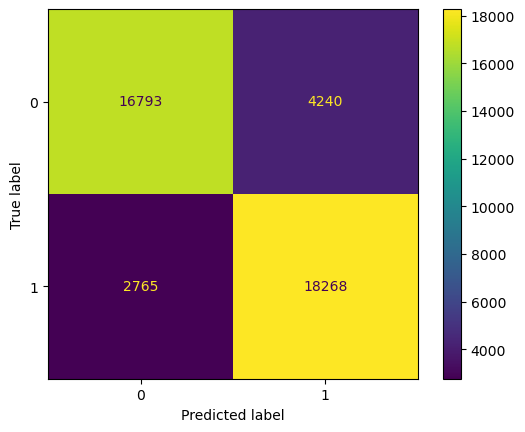

In [177]:
ConfusionMatrixDisplay.from_predictions(y_smt,knn_pred)

In [178]:
knnpred_prob=knnmodel.predict_proba(X_smt)[:,1]

In [179]:
fpr, tpr, thresholds = roc_curve(y_smt, knnpred_prob)

In [180]:
knnroc_auc = auc(fpr, tpr)

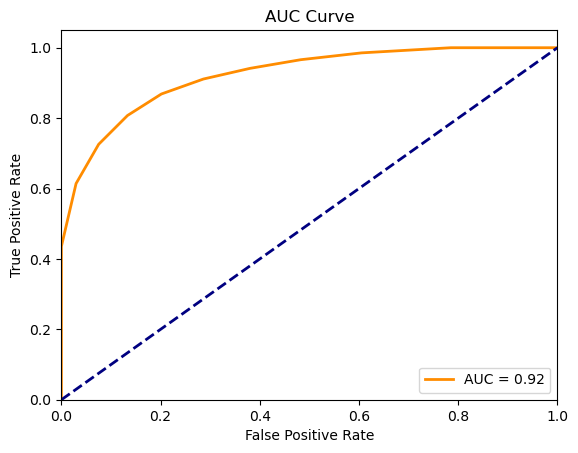

In [181]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % knnroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# XG Boosting H1N1 Vaccine

In [182]:
from xgboost import XGBClassifier

In [183]:
xgb=XGBClassifier()

In [184]:
xgbmodel=xgb.fit(X_smt,y_smt)

In [185]:
xgbmodel.score(X_smt,y_smt)

0.9234773926686636

In [186]:
np.mean(cross_val_score(xgb,X_smt,y_smt))

0.8518087464161136

In [187]:
xgb_pred=xgbmodel.predict(X_smt)

In [188]:
print(classification_report(y_smt,xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     21033
           1       0.93      0.92      0.92     21033

    accuracy                           0.92     42066
   macro avg       0.92      0.92      0.92     42066
weighted avg       0.92      0.92      0.92     42066



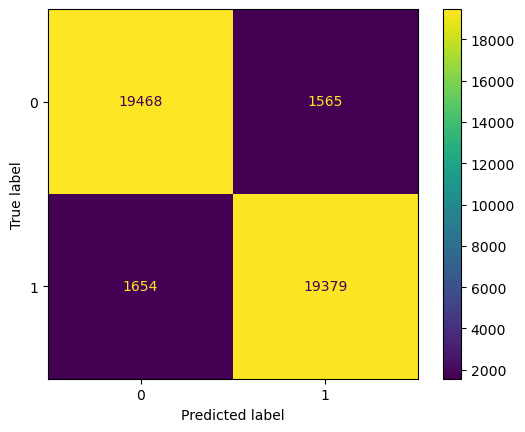

In [189]:
ConfusionMatrixDisplay.from_predictions(y_smt,xgb_pred)

In [190]:
xgbpred_prob=xgbmodel.predict_proba(X_smt)[:,1]

In [191]:
fpr, tpr, thresholds = roc_curve(y_smt, xgbpred_prob)

In [192]:
xgbroc_auc = auc(fpr, tpr)

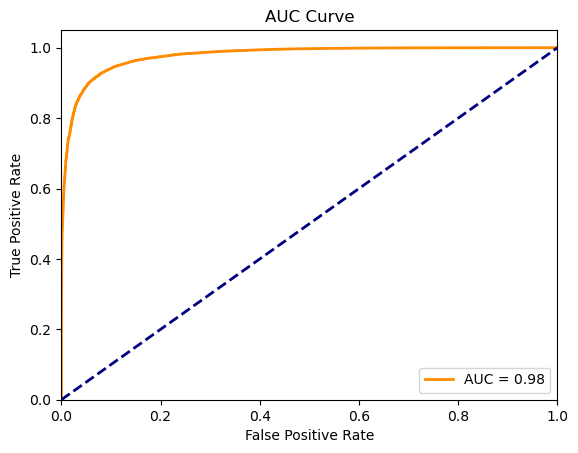

In [193]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % xgbroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# CatBoost H1N1 Vaccine

In [194]:
from catboost import CatBoostClassifier

In [195]:
cat=CatBoostClassifier()

In [196]:
catmodel=cat.fit(X_smt,y_smt)

Learning rate set to 0.050857
0:	learn: 0.6693250	total: 158ms	remaining: 2m 37s
1:	learn: 0.6492415	total: 172ms	remaining: 1m 25s
2:	learn: 0.6302099	total: 189ms	remaining: 1m 2s
3:	learn: 0.6128667	total: 200ms	remaining: 49.9s
4:	learn: 0.5975059	total: 213ms	remaining: 42.3s
5:	learn: 0.5837315	total: 223ms	remaining: 37s
6:	learn: 0.5720013	total: 236ms	remaining: 33.4s
7:	learn: 0.5610264	total: 246ms	remaining: 30.5s
8:	learn: 0.5508689	total: 256ms	remaining: 28.2s
9:	learn: 0.5427498	total: 265ms	remaining: 26.3s
10:	learn: 0.5341844	total: 274ms	remaining: 24.6s
11:	learn: 0.5261757	total: 284ms	remaining: 23.4s
12:	learn: 0.5185410	total: 295ms	remaining: 22.4s
13:	learn: 0.5125466	total: 305ms	remaining: 21.5s
14:	learn: 0.5066998	total: 316ms	remaining: 20.8s
15:	learn: 0.5010237	total: 326ms	remaining: 20.1s
16:	learn: 0.4957889	total: 335ms	remaining: 19.4s
17:	learn: 0.4911279	total: 344ms	remaining: 18.8s
18:	learn: 0.4868240	total: 354ms	remaining: 18.3s
19:	learn: 

In [197]:
catmodel.score(X_smt,y_smt)

0.9040317596158418

In [198]:
np.mean(cross_val_score(cat,X_smt,y_smt))

Learning rate set to 0.046235
0:	learn: 0.6664309	total: 15.6ms	remaining: 15.6s
1:	learn: 0.6426259	total: 33.3ms	remaining: 16.6s
2:	learn: 0.6208044	total: 48.5ms	remaining: 16.1s
3:	learn: 0.6032479	total: 63ms	remaining: 15.7s
4:	learn: 0.5857730	total: 77.8ms	remaining: 15.5s
5:	learn: 0.5698451	total: 93.2ms	remaining: 15.4s
6:	learn: 0.5556770	total: 108ms	remaining: 15.3s
7:	learn: 0.5437244	total: 123ms	remaining: 15.3s
8:	learn: 0.5315350	total: 139ms	remaining: 15.3s
9:	learn: 0.5221811	total: 155ms	remaining: 15.4s
10:	learn: 0.5123438	total: 171ms	remaining: 15.3s
11:	learn: 0.5035358	total: 186ms	remaining: 15.4s
12:	learn: 0.4949054	total: 202ms	remaining: 15.4s
13:	learn: 0.4872074	total: 218ms	remaining: 15.4s
14:	learn: 0.4806449	total: 234ms	remaining: 15.4s
15:	learn: 0.4740890	total: 250ms	remaining: 15.4s
16:	learn: 0.4678626	total: 265ms	remaining: 15.3s
17:	learn: 0.4617334	total: 280ms	remaining: 15.3s
18:	learn: 0.4564894	total: 295ms	remaining: 15.2s
19:	lea

0.8485517972782057

In [199]:
cat_pred=catmodel.predict(X_smt)

In [200]:
print(classification_report(y_smt,cat_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     21033
           1       0.91      0.90      0.90     21033

    accuracy                           0.90     42066
   macro avg       0.90      0.90      0.90     42066
weighted avg       0.90      0.90      0.90     42066



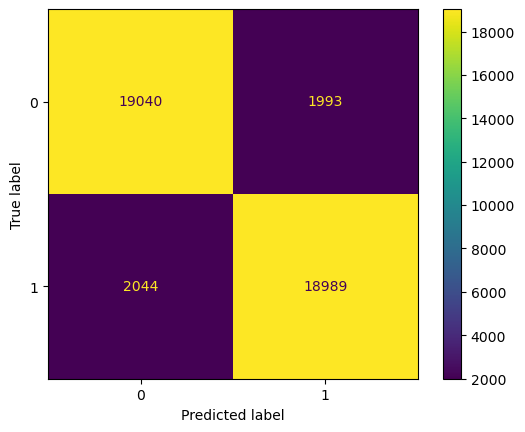

In [201]:
ConfusionMatrixDisplay.from_predictions(y_smt,cat_pred)

In [202]:
catpred_prob=catmodel.predict_proba(X_smt)[:,1]

In [203]:
fpr, tpr, thresholds = roc_curve(y_smt, catpred_prob)

In [204]:
catroc_auc = auc(fpr, tpr)

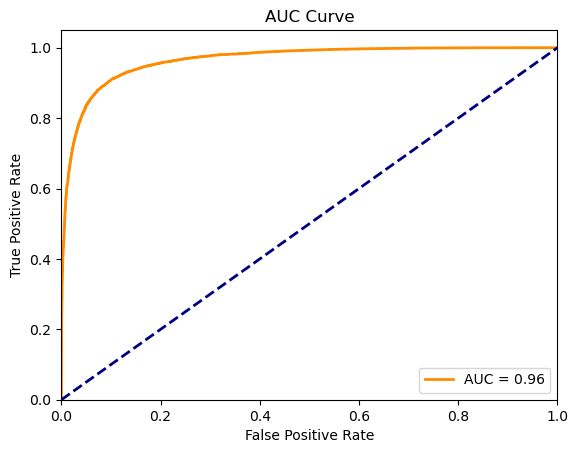

In [205]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % catroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# SEASONAL VACCINE

# Logistic Regression Seasonal Vaccine

In [206]:
logit=LogisticRegression(max_iter=2000)

In [207]:
logitmodel1=logit.fit(X,y1)

In [208]:
logitmodel1.score(X,y1)

0.7734676302093084

In [210]:
np.mean(cross_val_score(logit,X,y1))

0.7727940598680298

In [209]:
log_pred1=logitmodel1.predict(X)

In [211]:
print(classification_report(y1,log_pred1))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     14272
           1       0.77      0.74      0.75     12435

    accuracy                           0.77     26707
   macro avg       0.77      0.77      0.77     26707
weighted avg       0.77      0.77      0.77     26707



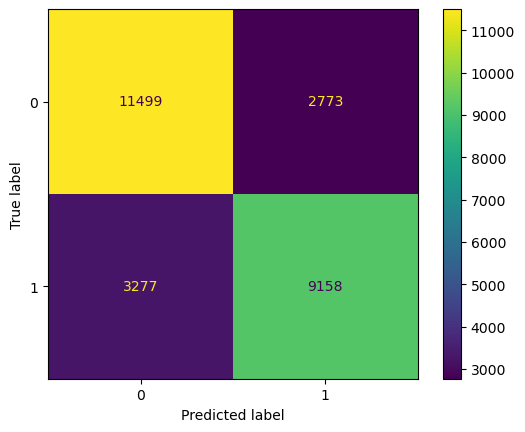

In [212]:
ConfusionMatrixDisplay.from_predictions(y1,log_pred1)

In [213]:
log_pred_prob1=logitmodel1.predict_proba(X)[:,1]

In [214]:
fpr, tpr, thresholds = roc_curve(y1, log_pred_prob1)

In [215]:
logroc_auc1 = auc(fpr, tpr)

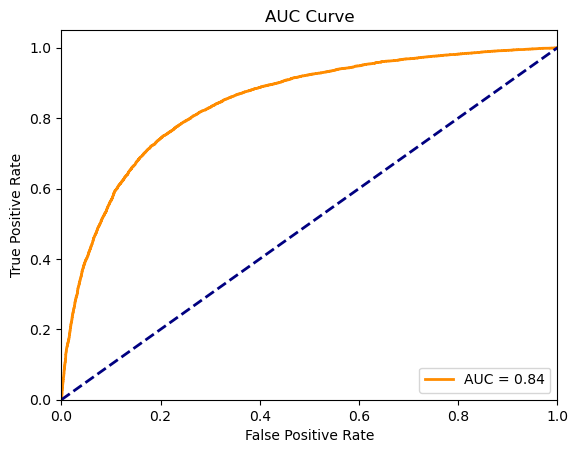

In [216]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % logroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

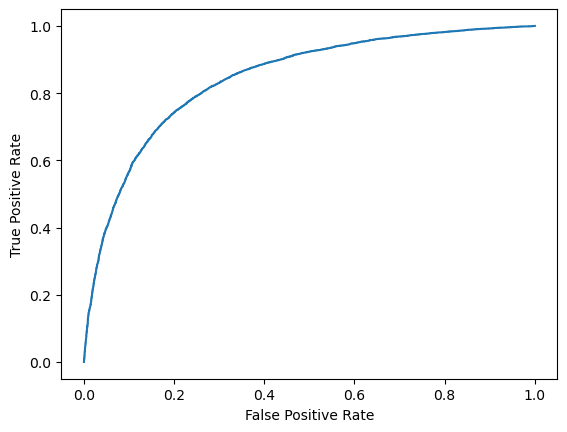

In [217]:
# Create ROC curve display
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()

# Decision Tree Seasonal Vaccine

In [218]:
tree=DecisionTreeClassifier(max_depth=10)

In [219]:
treemodel1=tree.fit(X,y1)

In [220]:
treemodel1.score(X,y1)

0.8133448159658516

In [221]:
np.mean(cross_val_score(tree,X,y1))

0.7441874282506618

In [222]:
tree_pred1=treemodel1.predict(X)

In [223]:
print(classification_report(y1,tree_pred1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83     14272
           1       0.80      0.79      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



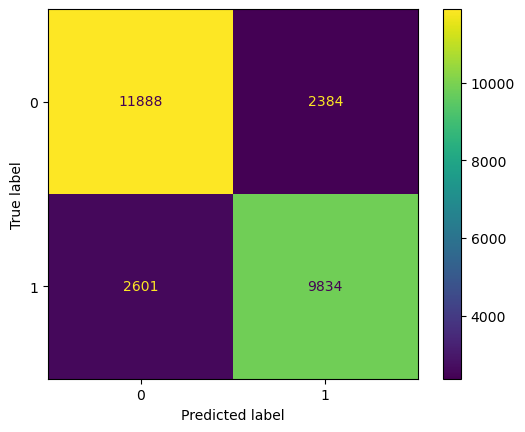

In [224]:
ConfusionMatrixDisplay.from_predictions(y1,tree_pred1)

In [225]:
treepred_prob1=treemodel1.predict_proba(X)[:,1]

In [226]:
fpr, tpr, thresholds = roc_curve(y1, treepred_prob1)

In [227]:
treeroc_auc1 = auc(fpr, tpr)

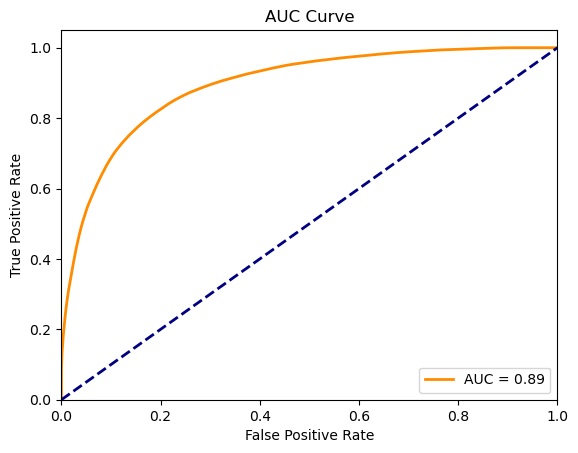

In [228]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % treeroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Seasonal Vaccine

In [229]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=10)

In [230]:
rfmodel1=rf.fit(X,y1)

In [231]:
rfmodel1.score(X,y1)

0.8227431010596473

In [232]:
np.mean(cross_val_score(rf,X,y1))

0.7757891997868189

In [233]:
rf_pred1=rfmodel1.predict(X)

In [234]:
print(classification_report(y1,rf_pred1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84     14272
           1       0.82      0.79      0.81     12435

    accuracy                           0.82     26707
   macro avg       0.82      0.82      0.82     26707
weighted avg       0.82      0.82      0.82     26707



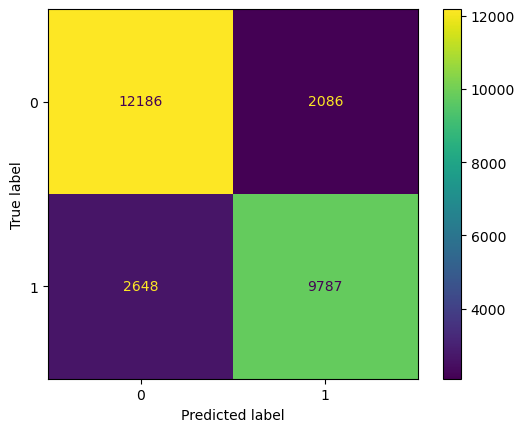

In [235]:
ConfusionMatrixDisplay.from_predictions(y1,rf_pred1)

In [236]:
rfpred_prob1=rfmodel1.predict_proba(X)[:,1]

In [237]:
fpr, tpr, thresholds = roc_curve(y1, rfpred_prob1)

In [238]:
rfroc_auc1 = auc(fpr, tpr)

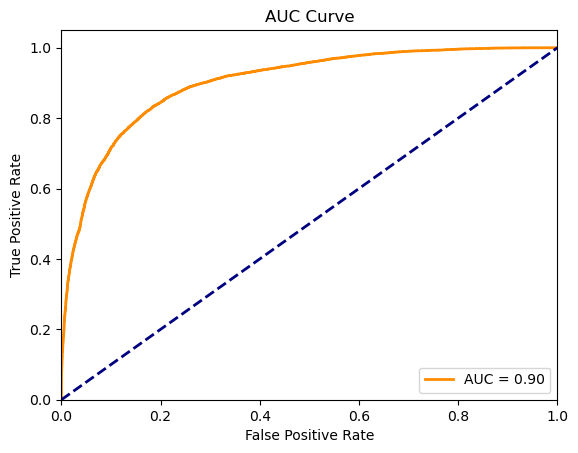

In [239]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % rfroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting Seasonal Vaccine

In [240]:
gb=GradientBoostingClassifier(n_estimators=700,max_depth=3)

In [241]:
gbmodel1=gb.fit(X,y1)

In [242]:
gbmodel1.score(X,y1)

0.8063429063541394

In [243]:
np.mean(cross_val_score(gb,X,y1))

0.7818177599577059

In [244]:
gb_pred1=gbmodel1.predict(X)

In [245]:
print(classification_report(y1,gb_pred1))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     14272
           1       0.80      0.78      0.79     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.80      0.81     26707
weighted avg       0.81      0.81      0.81     26707



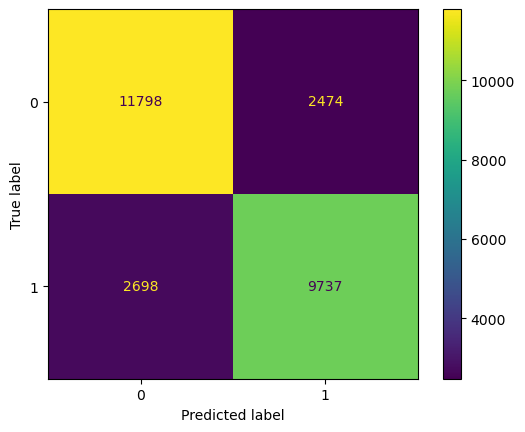

In [246]:
ConfusionMatrixDisplay.from_predictions(y1,gb_pred1)

In [247]:
gbpred_prob1=gbmodel1.predict_proba(X)[:,1]

In [248]:
fpr, tpr, thresholds = roc_curve(y1, gbpred_prob1)

In [249]:
gbroc_auc1 = auc(fpr, tpr)

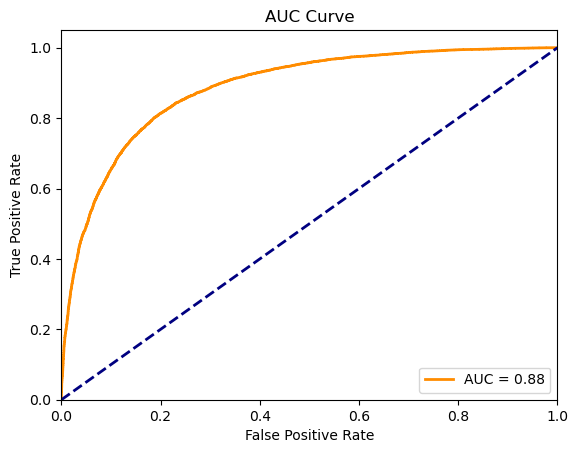

In [250]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % gbroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes Seasonal Vaccine

In [251]:
nb=BernoulliNB()

In [252]:
nbmodel1=nb.fit(X,y1)

In [253]:
nbmodel1.score(X,y1)

0.7092896993297637

In [254]:
np.mean(cross_val_score(nb,X,y1))

0.7088403246054501

In [255]:
nb_pred1=nbmodel1.predict(X)

In [256]:
print(classification_report(y1,nb_pred1))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     14272
           1       0.68      0.70      0.69     12435

    accuracy                           0.71     26707
   macro avg       0.71      0.71      0.71     26707
weighted avg       0.71      0.71      0.71     26707



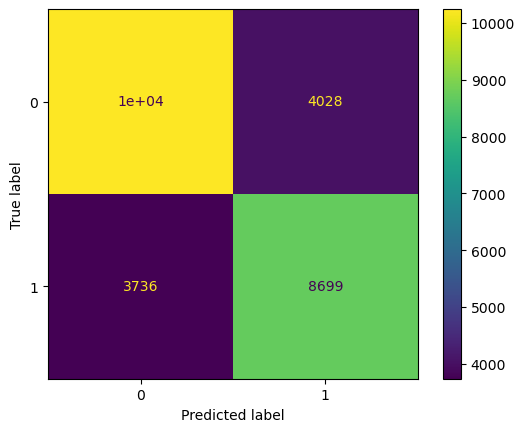

In [257]:
ConfusionMatrixDisplay.from_predictions(y1,nb_pred1)

In [258]:
nbpred_prob1=nbmodel1.predict_proba(X)[:,1]

In [259]:
fpr, tpr, thresholds = roc_curve(y1, nbpred_prob1)

In [260]:
nbroc_auc1 = auc(fpr, tpr)

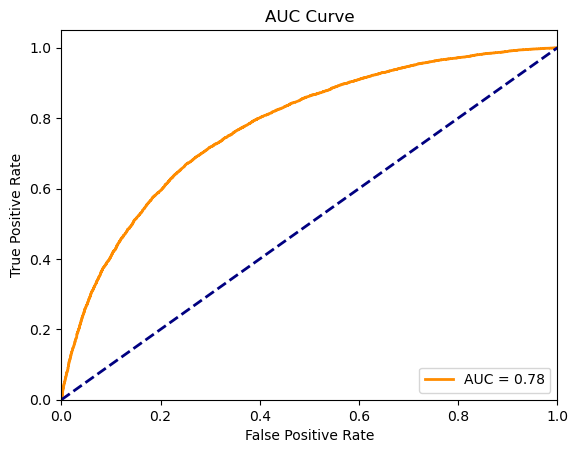

In [261]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % nbroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine Seasonal Vaccine

In [262]:
svc=SVC(probability=True)

In [263]:
svcmodel1=svc.fit(X,y1)

In [264]:
svcmodel1.score(X,y1)

0.7780357209720298

In [265]:
np.mean(cross_val_score(svc,X,y1))

0.7739171505917188

In [266]:
svc_pred1=svcmodel1.predict(X)

In [267]:
print(classification_report(y1,svc_pred1))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80     14272
           1       0.77      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707



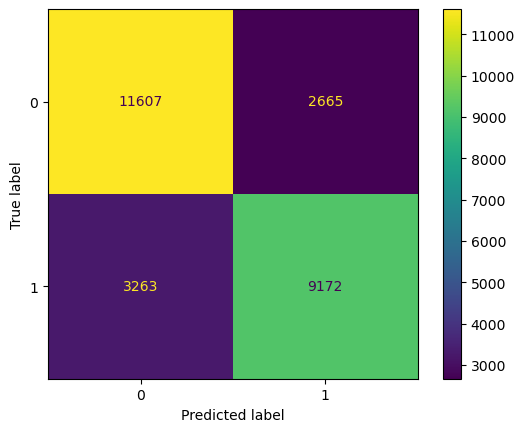

In [268]:
ConfusionMatrixDisplay.from_predictions(y1,svc_pred1)

In [269]:
svcpred_prob1=svcmodel1.predict_proba(X)[:,1]

In [270]:
fpr, tpr, thresholds = roc_curve(y1, svcpred_prob1)

In [271]:
svcroc_auc1 = auc(fpr, tpr)

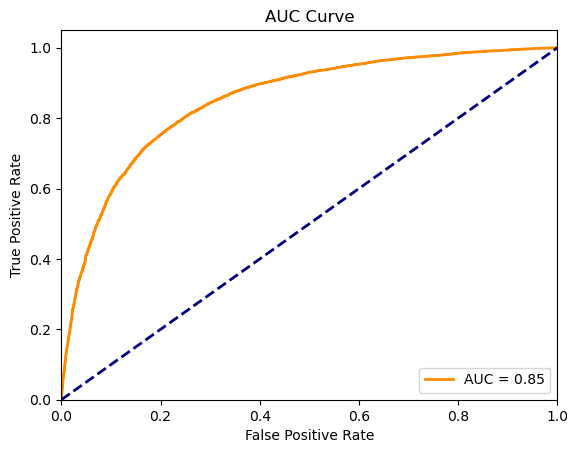

In [272]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % svcroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# KNearest Neighbours Seasonal Vaccine

In [273]:
knn=KNeighborsClassifier()

In [274]:
krange=list(range(1,41))
param_grid=dict(n_neighbors=krange)
grid=GridSearchCV(knn,param_grid,cv=3)

In [275]:
grid_search=grid.fit(X,y1)

In [276]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=38)

In [277]:
grid_search.best_params_

{'n_neighbors': 38}

In [278]:
knn=KNeighborsClassifier(n_neighbors=38)

In [279]:
knnmodel1=knn.fit(X,y1)

In [280]:
knnmodel1.score(X,y1)

0.7598756880218669

In [281]:
np.mean(cross_val_score(knn,X,y1))

0.7390947489771175

In [282]:
knn_pred1=knnmodel1.predict(X)

In [283]:
print(classification_report(y1,knn_pred1))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     14272
           1       0.75      0.72      0.74     12435

    accuracy                           0.76     26707
   macro avg       0.76      0.76      0.76     26707
weighted avg       0.76      0.76      0.76     26707



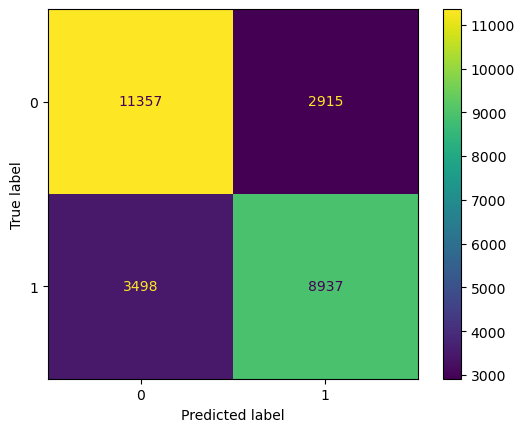

In [284]:
ConfusionMatrixDisplay.from_predictions(y1,knn_pred1)

In [285]:
knnpred_prob1=knnmodel1.predict_proba(X)[:,1]

In [286]:
fpr, tpr, thresholds = roc_curve(y1, knnpred_prob1)

In [287]:
knnroc_auc1 = auc(fpr, tpr)

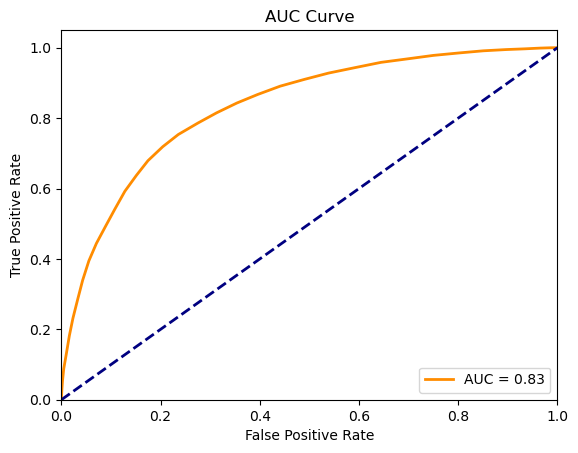

In [288]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % knnroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# XG Boosting Seasonal Vaccine

In [289]:
xgb=XGBClassifier(max_depth=3)

In [290]:
xgbmodel1=xgb.fit(X,y1)

In [291]:
xgbmodel1.score(X,y1)

0.7960459804545624

In [292]:
np.mean(cross_val_score(xgb,X,y1))

0.7806194474327468

In [293]:
xgb_pred1=xgbmodel1.predict(X)

In [294]:
print(classification_report(y1,xgb_pred1))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     14272
           1       0.79      0.77      0.78     12435

    accuracy                           0.80     26707
   macro avg       0.80      0.79      0.79     26707
weighted avg       0.80      0.80      0.80     26707



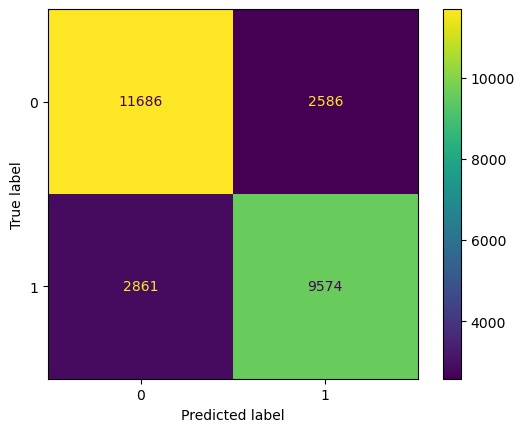

In [295]:
ConfusionMatrixDisplay.from_predictions(y1,xgb_pred1)

In [296]:
xgbpred_prob1=xgbmodel1.predict_proba(X)[:,1]

In [297]:
fpr, tpr, thresholds = roc_curve(y1, xgbpred_prob1)

In [298]:
xgbroc_auc1 = auc(fpr, tpr)

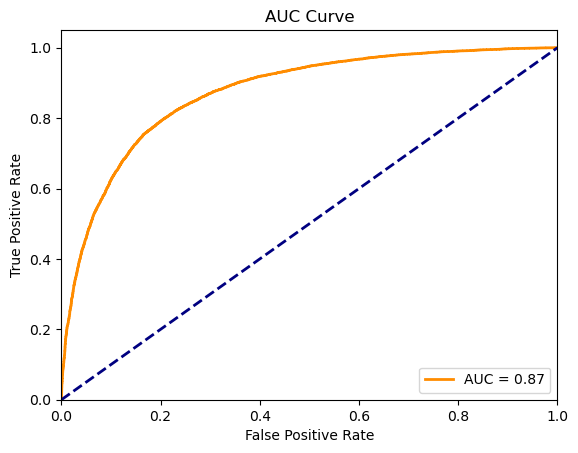

In [299]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % xgbroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

# CatBoost H1N1 Vaccine

In [300]:
cat=CatBoostClassifier(iterations=300,learning_rate=0.1,depth=5)

In [301]:
catmodel1=cat.fit(X,y1)

0:	learn: 0.6565369	total: 11.8ms	remaining: 3.53s
1:	learn: 0.6272893	total: 25.4ms	remaining: 3.79s
2:	learn: 0.6044138	total: 36.4ms	remaining: 3.61s
3:	learn: 0.5853148	total: 50.1ms	remaining: 3.71s
4:	learn: 0.5698868	total: 62.7ms	remaining: 3.7s
5:	learn: 0.5579354	total: 76ms	remaining: 3.72s
6:	learn: 0.5479865	total: 90ms	remaining: 3.77s
7:	learn: 0.5396561	total: 103ms	remaining: 3.76s
8:	learn: 0.5329684	total: 117ms	remaining: 3.77s
9:	learn: 0.5267853	total: 129ms	remaining: 3.75s
10:	learn: 0.5223097	total: 143ms	remaining: 3.77s
11:	learn: 0.5173834	total: 156ms	remaining: 3.74s
12:	learn: 0.5131584	total: 173ms	remaining: 3.81s
13:	learn: 0.5100775	total: 196ms	remaining: 4.01s
14:	learn: 0.5070164	total: 222ms	remaining: 4.21s
15:	learn: 0.5048434	total: 248ms	remaining: 4.4s
16:	learn: 0.5024595	total: 293ms	remaining: 4.88s
17:	learn: 0.5000741	total: 333ms	remaining: 5.22s
18:	learn: 0.4985109	total: 387ms	remaining: 5.72s
19:	learn: 0.4964550	total: 431ms	remain

In [302]:
catmodel1.score(X,y1)

0.8107986670161381

In [303]:
np.mean(cross_val_score(cat,X,y1))

0:	learn: 0.6559733	total: 25.8ms	remaining: 7.7s
1:	learn: 0.6261944	total: 48.9ms	remaining: 7.28s
2:	learn: 0.6031199	total: 66.2ms	remaining: 6.56s
3:	learn: 0.5841867	total: 83.8ms	remaining: 6.2s
4:	learn: 0.5697288	total: 104ms	remaining: 6.15s
5:	learn: 0.5574495	total: 122ms	remaining: 6s
6:	learn: 0.5482619	total: 142ms	remaining: 5.95s
7:	learn: 0.5388650	total: 166ms	remaining: 6.08s
8:	learn: 0.5324484	total: 192ms	remaining: 6.2s
9:	learn: 0.5265217	total: 216ms	remaining: 6.27s
10:	learn: 0.5207657	total: 237ms	remaining: 6.22s
11:	learn: 0.5159945	total: 254ms	remaining: 6.1s
12:	learn: 0.5126207	total: 272ms	remaining: 6.01s
13:	learn: 0.5090846	total: 290ms	remaining: 5.93s
14:	learn: 0.5068368	total: 306ms	remaining: 5.82s
15:	learn: 0.5034995	total: 324ms	remaining: 5.75s
16:	learn: 0.5013981	total: 340ms	remaining: 5.66s
17:	learn: 0.4990088	total: 358ms	remaining: 5.62s
18:	learn: 0.4969010	total: 376ms	remaining: 5.56s
19:	learn: 0.4951236	total: 394ms	remaining:

0.7815556928379326

In [304]:
cat_pred1=catmodel1.predict(X)

In [305]:
print(classification_report(y1,cat_pred1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82     14272
           1       0.80      0.79      0.79     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



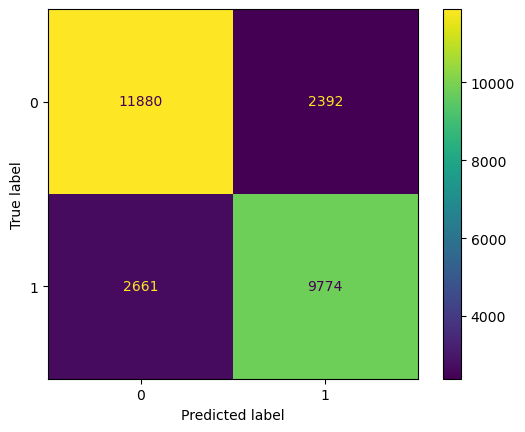

In [306]:
ConfusionMatrixDisplay.from_predictions(y1,cat_pred1)

In [307]:
catpred_prob1=catmodel1.predict_proba(X)[:,1]

In [308]:
fpr, tpr, thresholds = roc_curve(y1, catpred_prob1)

In [309]:
catroc_auc1 = auc(fpr, tpr)

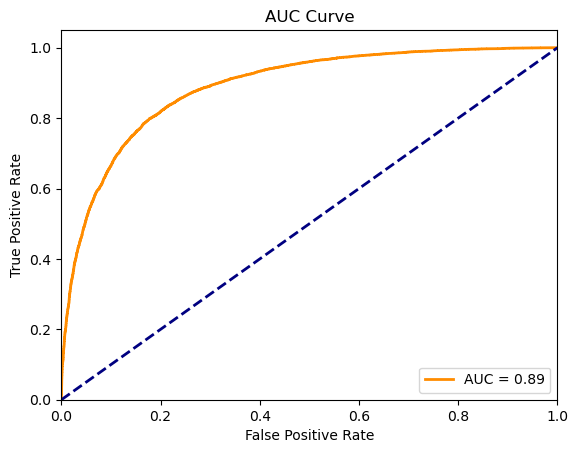

In [310]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % catroc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [314]:
h1n1_rf=rfmodel.predict_proba(vaccinetest_df)
seasonal_rf=rfmodel1.predict_proba(vaccinetest_df)

In [316]:
pd.DataFrame(h1n1_rf).to_csv('h1n1_rf.csv')
pd.DataFrame(seasonal_rf).to_csv('seasonal_rf.csv')

In [317]:
h1n1_tree=treemodel.predict_proba(vaccinetest_df)
seasonal_tree=treemodel1.predict_proba(vaccinetest_df)

In [318]:
pd.DataFrame(h1n1_tree).to_csv('h1n1_tree.csv')
pd.DataFrame(seasonal_tree).to_csv('seasonal_tree.csv')

In [319]:
h1n1_gb=gbmodel.predict_proba(vaccinetest_df)
seasonal_gb=gbmodel1.predict_proba(vaccinetest_df)

In [320]:
pd.DataFrame(h1n1_gb).to_csv('h1n1_gb.csv')
pd.DataFrame(seasonal_gb).to_csv('seasonal_gb.csv')

In [321]:
h1n1_xgb=xgbmodel.predict_proba(vaccinetest_df)
seasonal_xgb=xgbmodel1.predict_proba(vaccinetest_df)

In [322]:
pd.DataFrame(h1n1_xgb).to_csv('h1n1_xgb.csv')
pd.DataFrame(seasonal_xgb).to_csv('seasonal_xgb.csv')

In [323]:
h1n1_cat=catmodel.predict_proba(vaccinetest_df)
seasonal_cat=catmodel1.predict_proba(vaccinetest_df)

In [324]:
pd.DataFrame(h1n1_cat).to_csv('h1n1_cat.csv')
pd.DataFrame(seasonal_cat).to_csv('seasonal_cat.csv')

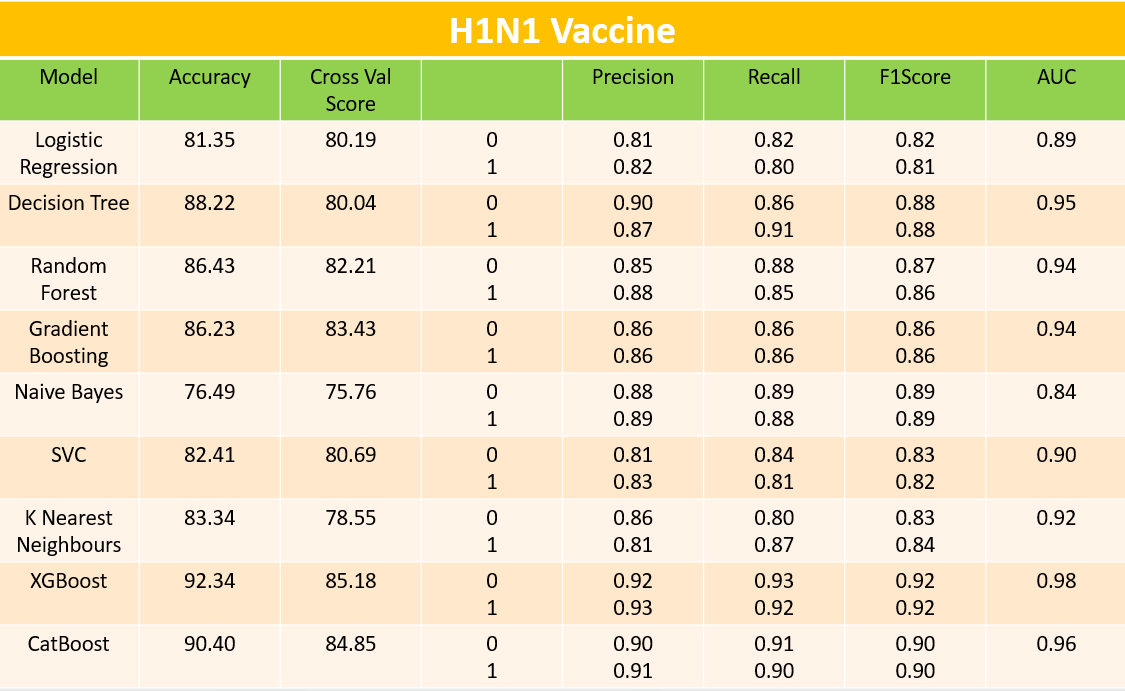

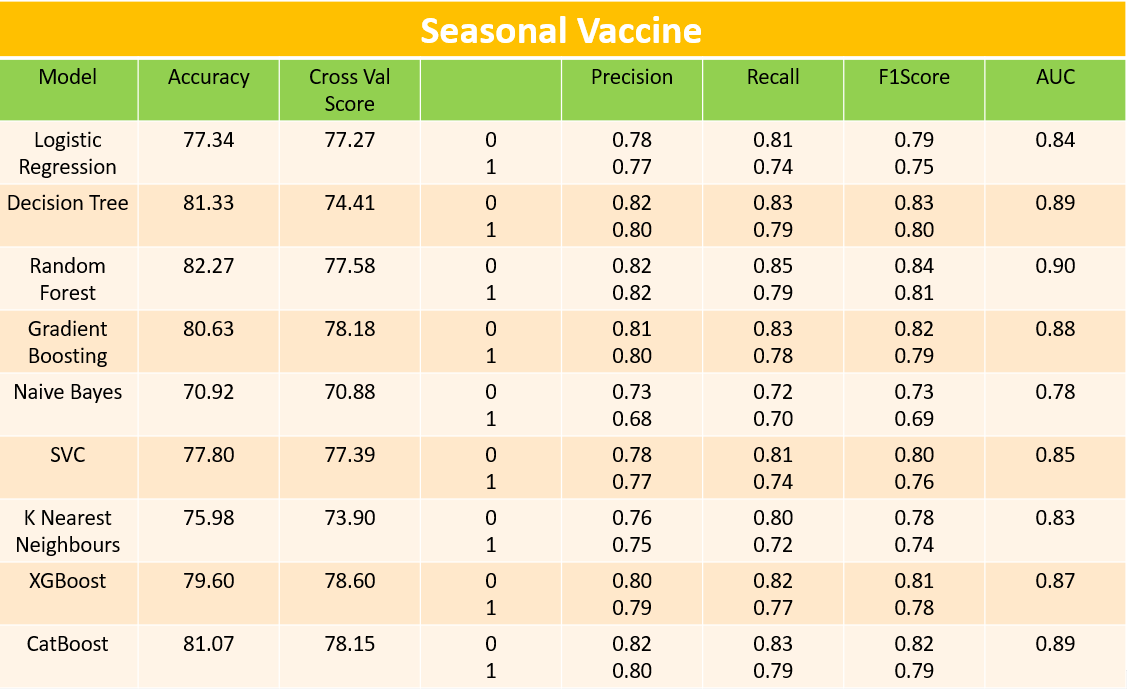

# Conclusion:

I entered the predicted test values into the competition Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines on the drivendata.org website. Of all of the models The most accurate classification method is CatBoost Model with accuracy 0.8179